<a href="https://colab.research.google.com/github/jtndr26/Cardiovascular_risk/blob/main/Cardio_Vascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised ML - Classification
## Contributor: Individual</br>
## Team member: Jeetendra Sarpe.

## Business Context:
Heart Disease are now becoming a regular problem for people of all classes and age groups. Countering the threat of Cardia arrest or any Heart related problem will be  a boon to the society. Hence under this study, we’re analyzing a data where we’ve details of few thousand candidates with their health records and whether they had a Coronary Heart disease (CHD) in the past 10 years.

## Problem Description:
Provide a study/model that predict whether a patient has risk of Coronary Heart Disease.

## Github Link:


## Loading and Understanding the Data.

In [268]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [269]:
# Importing require libraries
import numpy as np,pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [270]:
# Supressing the Warnings
import warnings
warnings.filterwarnings('ignore')

In [271]:
# Reading the Data
path = '/content/drive/My Drive/Colab Notebooks/KNN/data_cardiovascular_risk.csv'
df = pd.read_csv(path)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [272]:
df.shape

(3390, 17)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [274]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [275]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## Data Manipulation

In [276]:
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [277]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [278]:
for i in ['cigsPerDay','totChol','BMI','heartRate','glucose']:
  print(i)
  print('Mean:',df[i].mean())
  print('Median:',df[i].median(),'\n')

cigsPerDay
Mean: 9.069477434679335
Median: 0.0 

totChol
Mean: 237.07428400954655
Median: 234.0 

BMI
Mean: 25.7949644549763
Median: 25.38 

heartRate
Mean: 75.97727943346119
Median: 75.0 

glucose
Mean: 82.08651976668827
Median: 78.0 



Imputing missing values with the median of the respective contiuous variable and with mode for categorical.

In [279]:
df['education'].fillna(df['education'].mode()[0],inplace = True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace = True)

In [280]:
df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [281]:
for i in ['cigsPerDay','totChol','BMI','heartRate','glucose']:
  df[i].fillna(df[i].median(),inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [282]:
df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.946018,NaN,NaN,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,978.753033,8.592878,1.017568,NaN,NaN,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


In [283]:
df.drop('id',axis = 1,inplace = True)
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [284]:
num_cols = []
cat_cols = []
for i in df.columns:
  if df[i].nunique() > 5:
    num_cols.append(i)
  else:
    cat_cols.append(i)
print('Num_cols:',num_cols)
print('Cat_cols:',cat_cols)

Num_cols: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Cat_cols: ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


## EDA

### Univariate Analysis

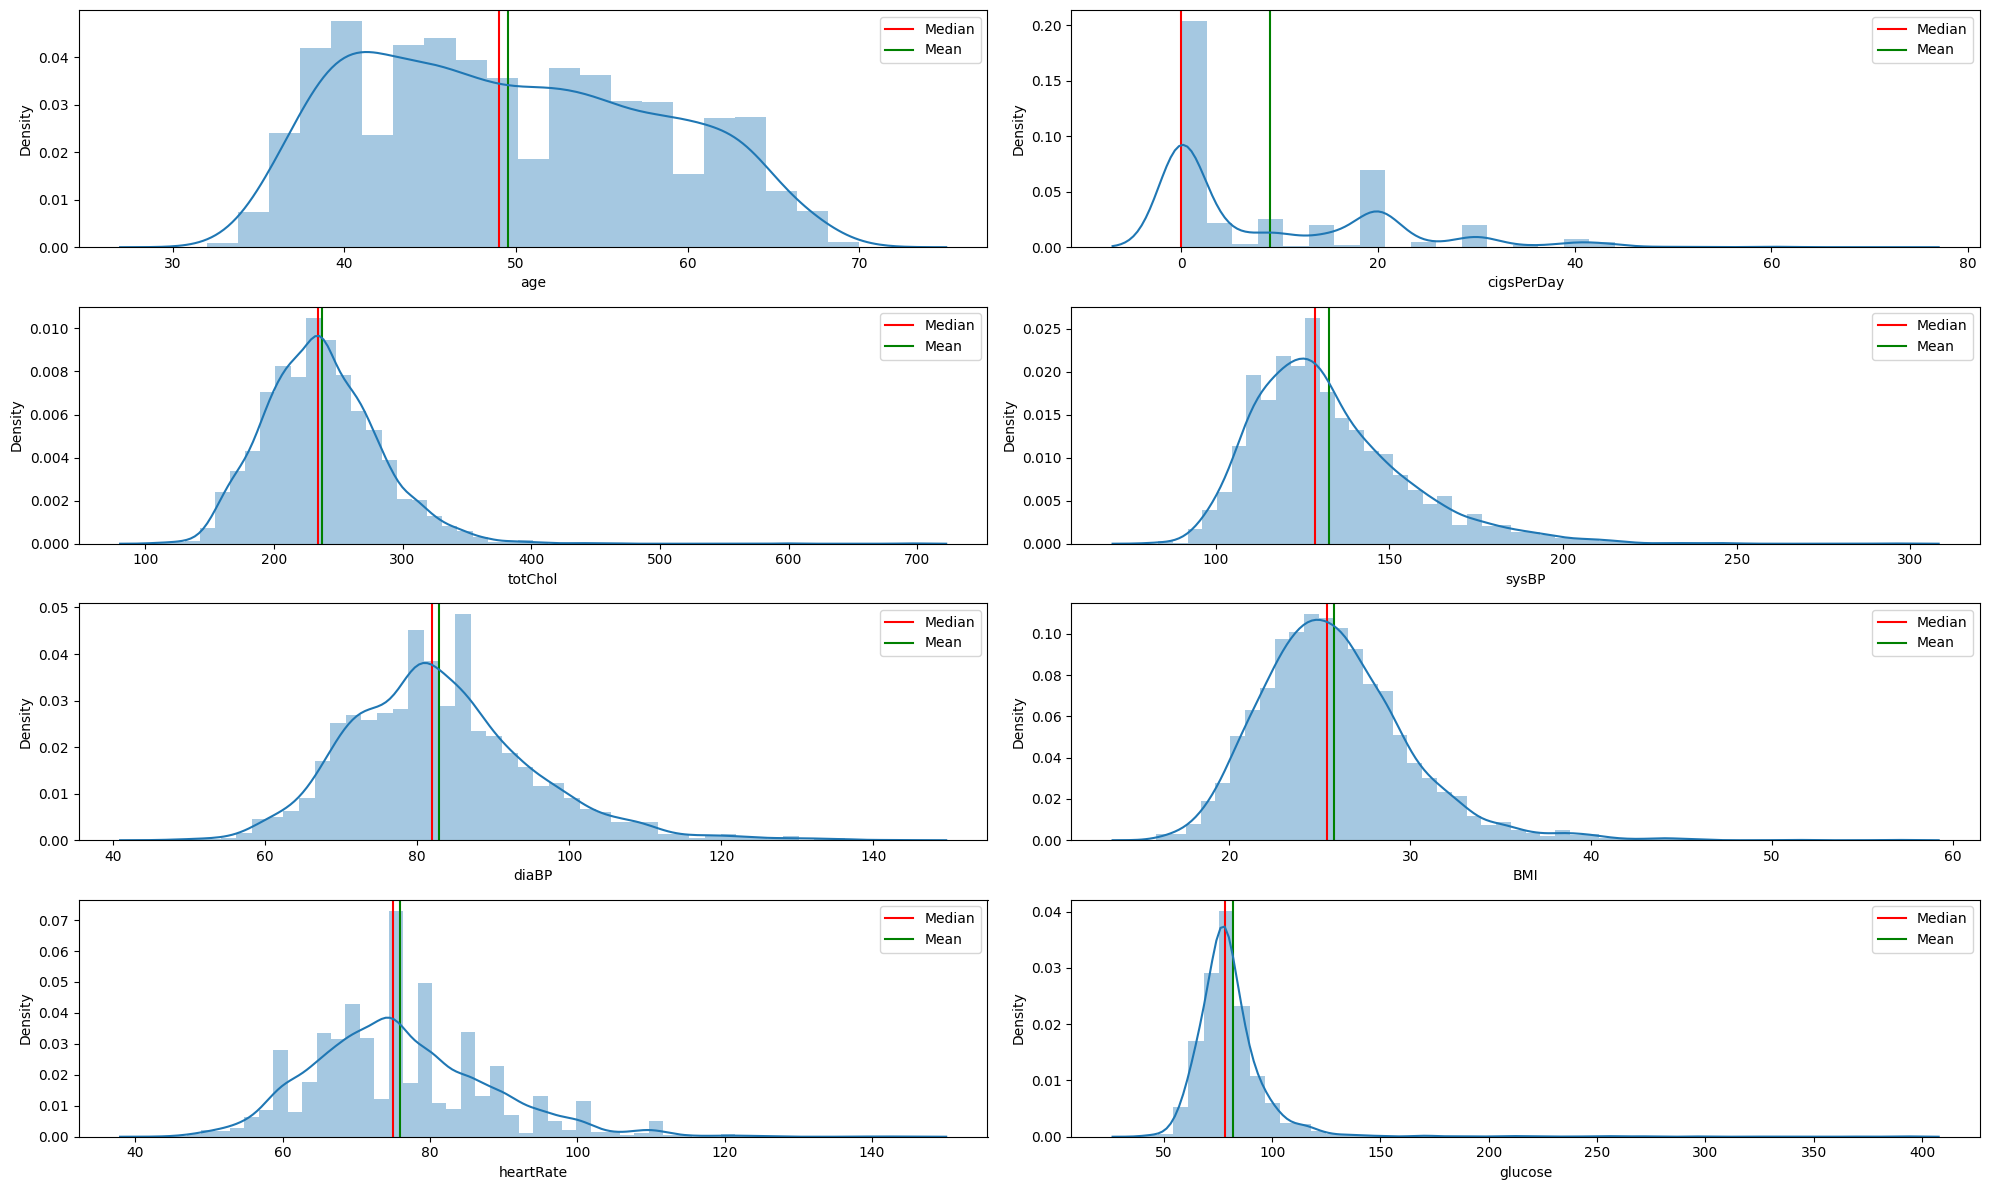

In [285]:
plt.figure(figsize = (20,12))
for i in range(len(num_cols)):
  plt.subplot(len(num_cols)//2,2,i+1)
  plt.axvline(x = df[num_cols[i]].median(),color = 'red')
  plt.axvline(x = df[num_cols[i]].mean(),color = 'green')
  sns.distplot(df[num_cols[i]])
  plt.legend(['Median','Mean'])
  plt.tight_layout()
plt.show()

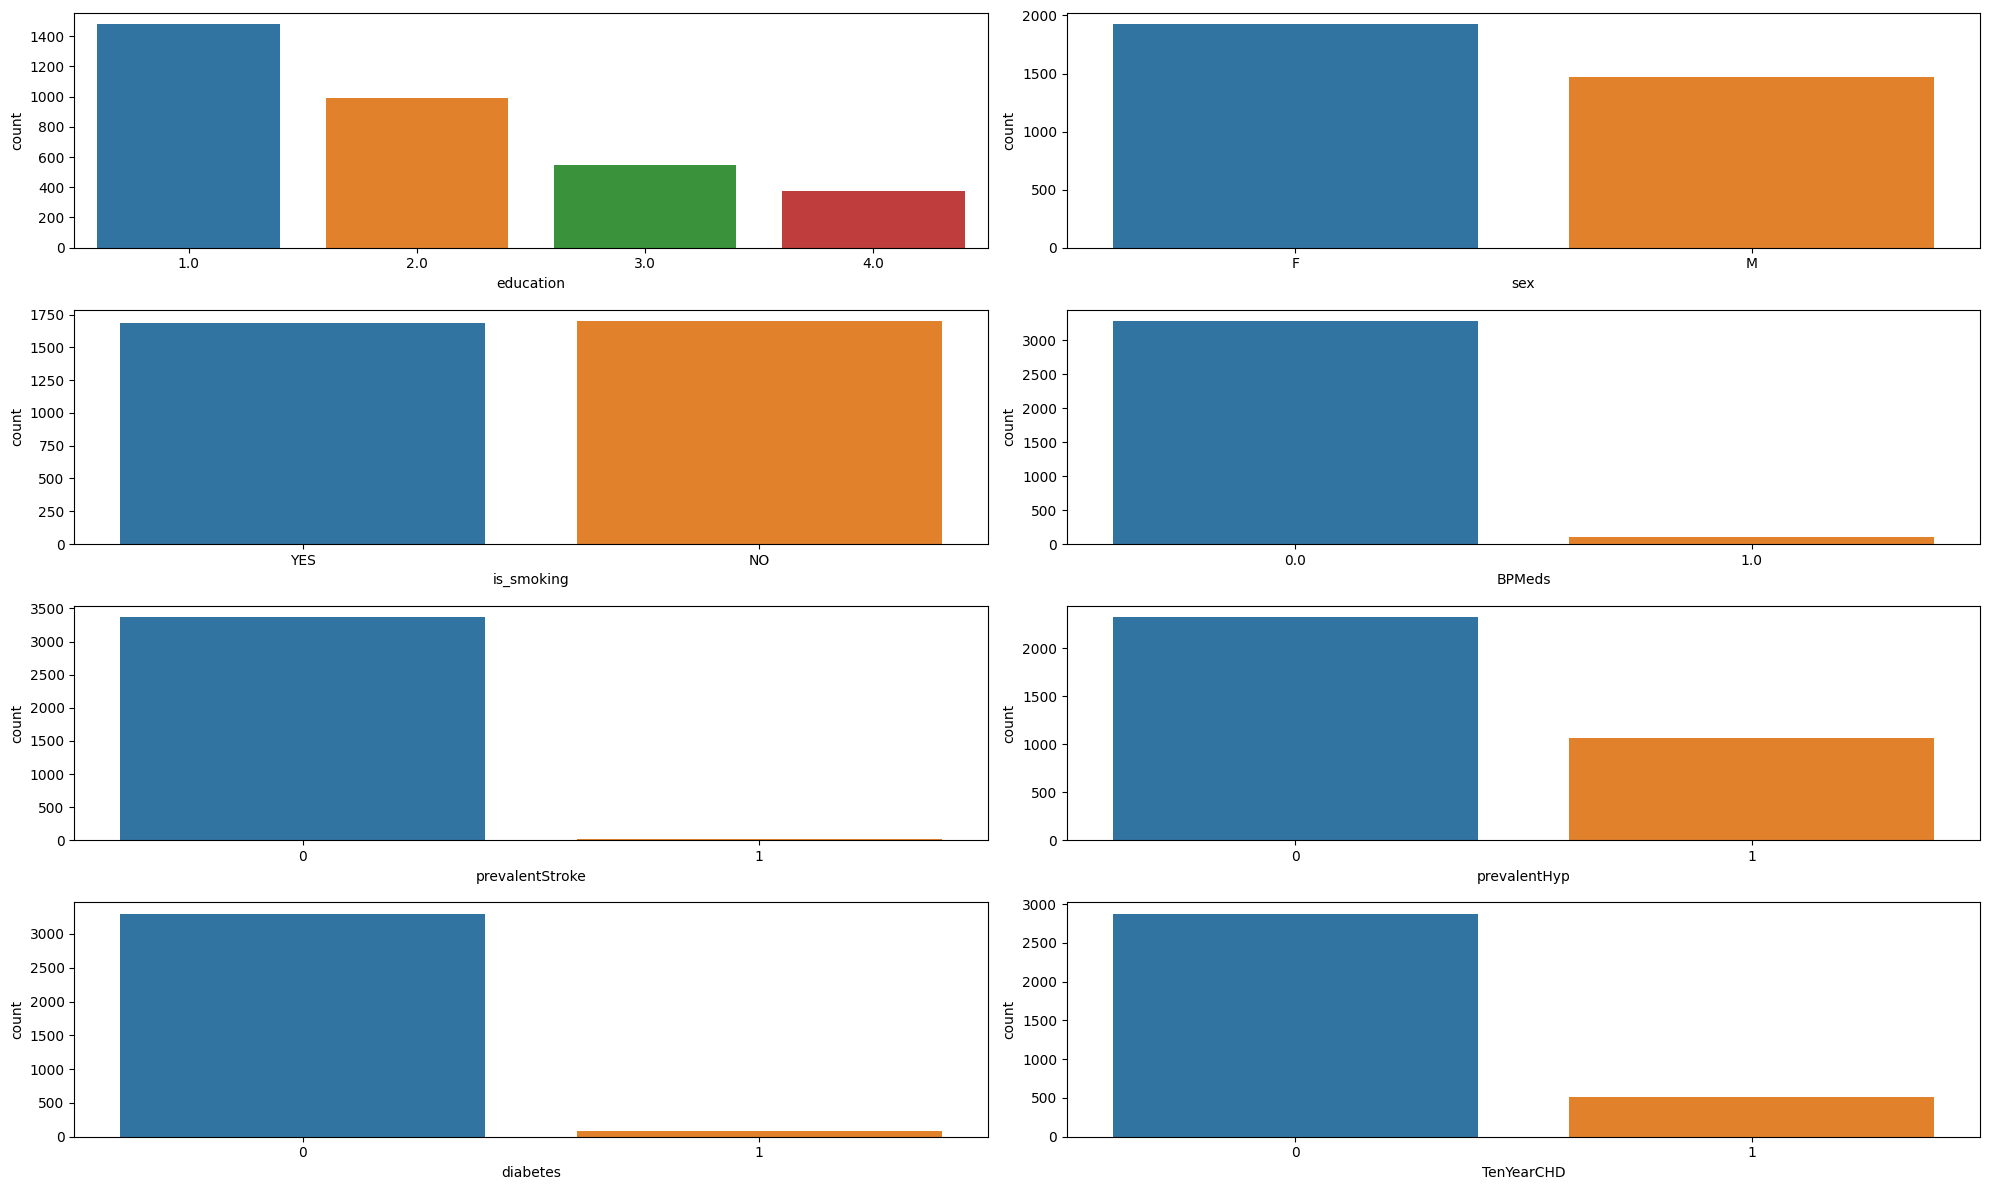

In [286]:
plt.figure(figsize = (20,12))
for i in range(len(cat_cols)):
  plt.subplot(len(cat_cols)//2,2,i+1)
  sns.countplot(x = cat_cols[i], data = df)
  plt.tight_layout()
plt.show()

### Bivariate Analysis

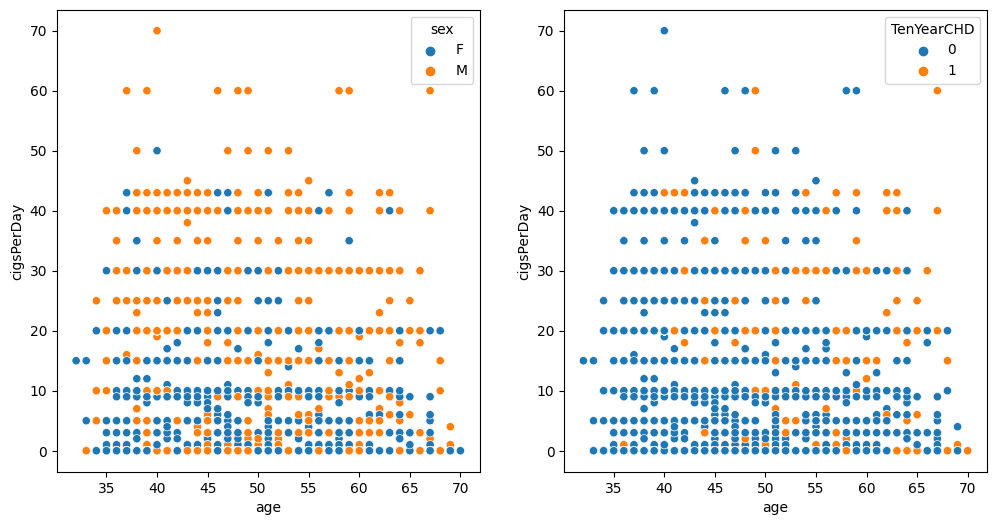

In [287]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.scatterplot(x = 'age',y = 'cigsPerDay',data = df, hue = 'sex')
plt.subplot(1,2,2)
sns.scatterplot(x = 'age',y = 'cigsPerDay',data = df, hue = 'TenYearCHD')
plt.show()

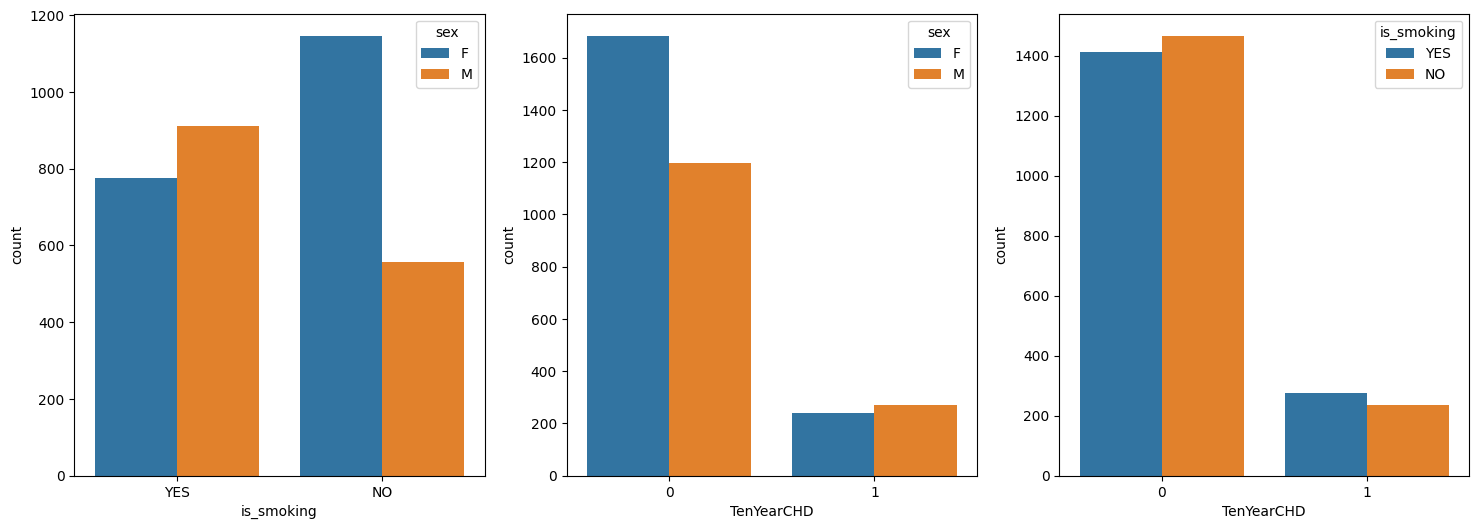

In [288]:
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.countplot(data = df, x = 'is_smoking', hue = 'sex')
plt.subplot(1,3,2)
sns.countplot(data = df, x = 'TenYearCHD', hue = 'sex')
plt.subplot(1,3,3)
sns.countplot(data = df, x = 'TenYearCHD', hue = 'is_smoking')
plt.show()

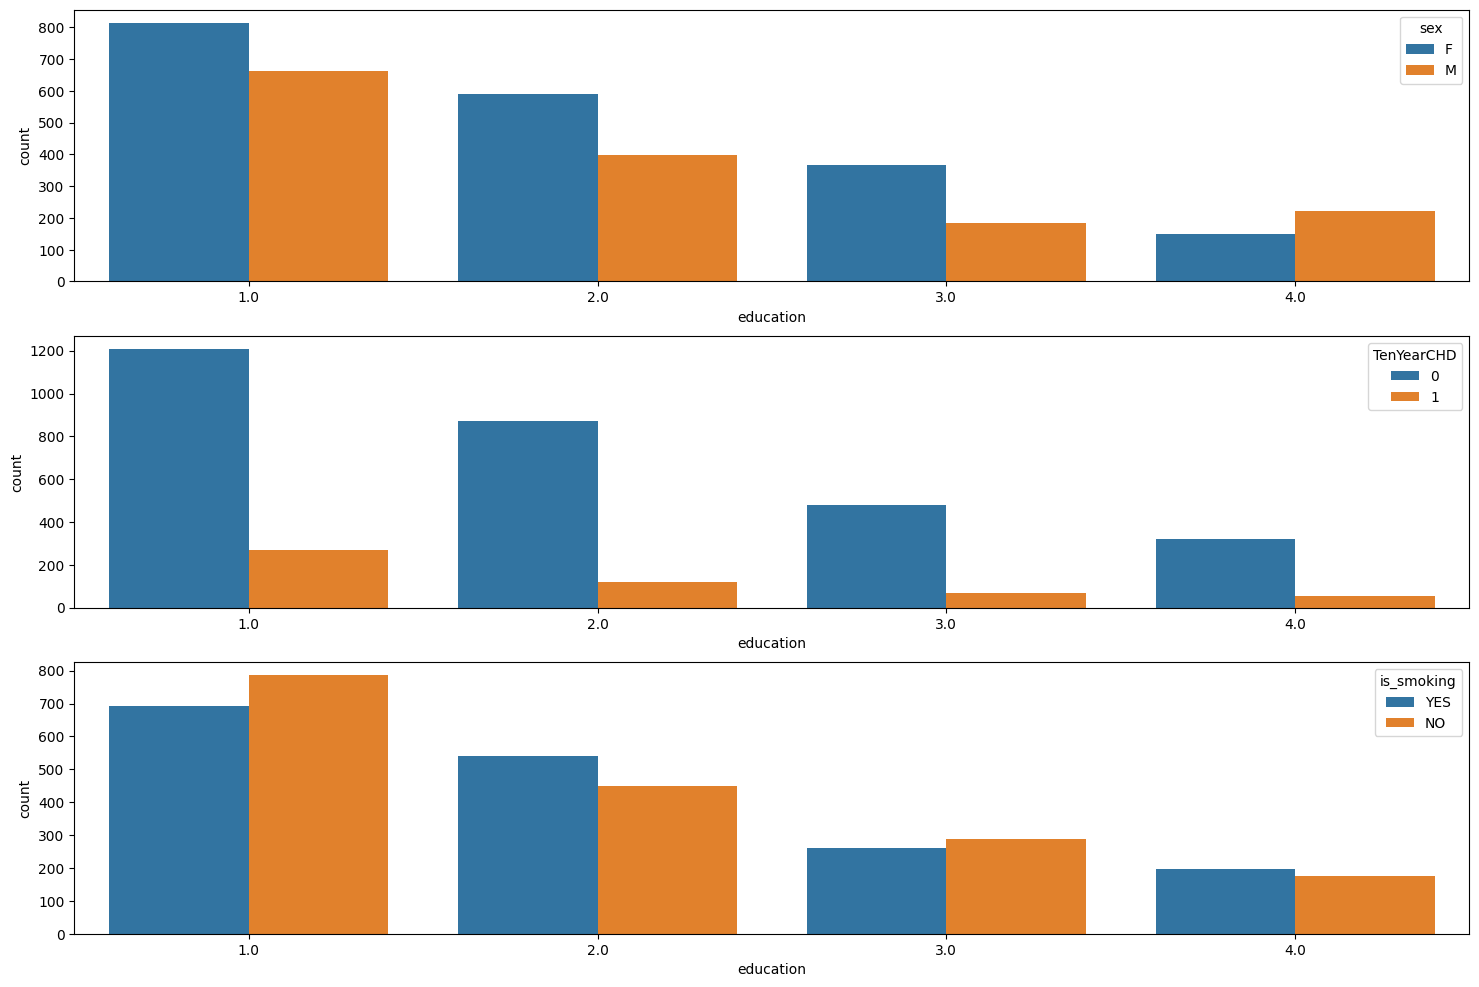

In [289]:
plt.figure(figsize = (18,12))
plt.subplot(3,1,1)
sns.countplot(data = df, x = 'education', hue = 'sex')
plt.subplot(3,1,2)
sns.countplot(data = df, x = 'education', hue = 'TenYearCHD')
plt.subplot(3,1,3)
sns.countplot(data = df, x = 'education', hue = 'is_smoking')
plt.show()

In [290]:
print(num_cols)
print(cat_cols)

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


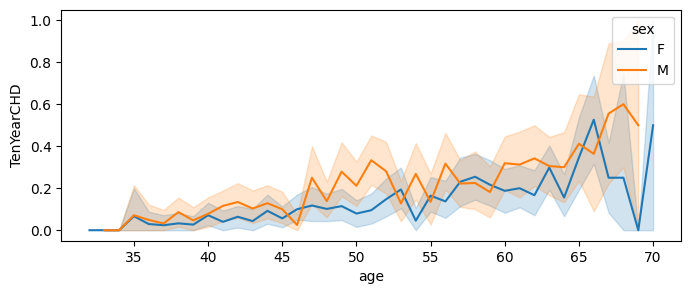

In [291]:
plt.figure(figsize = (8,3))
sns.lineplot(data = df,x = 'age',y = 'TenYearCHD',hue = 'sex')
plt.show()

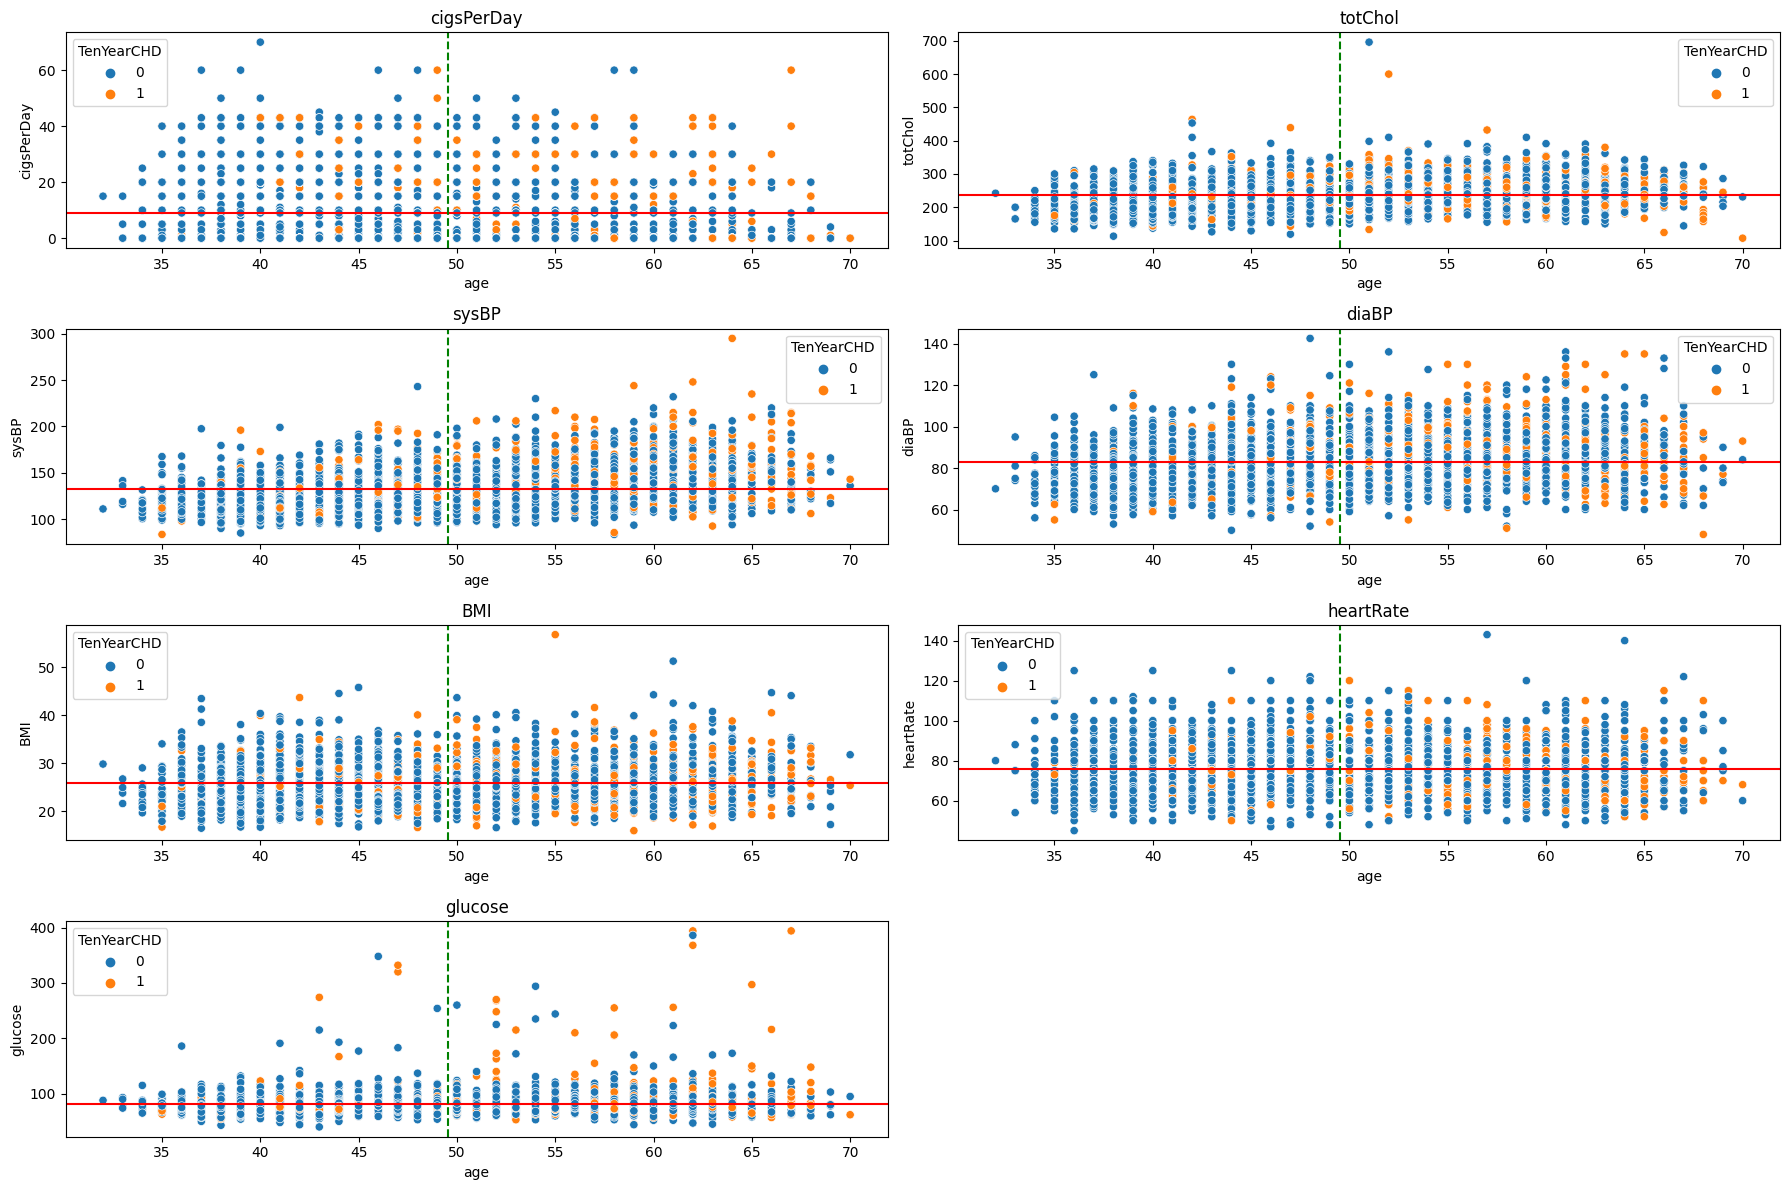

In [292]:
plt.figure(figsize = (18,12))
for j in range(1,len(num_cols)):
  plt.subplot(len(num_cols)//2,2,j)
  sns.scatterplot(data = df,x = 'age',y = df[num_cols[j]],hue = df['TenYearCHD'])
  plt.axhline(df[num_cols[j]].mean(),color = 'red')
  plt.axvline(df['age'].mean(),color = 'green',linestyle = 'dashed')
  plt.title(num_cols[j])
  plt.tight_layout()
plt.show()

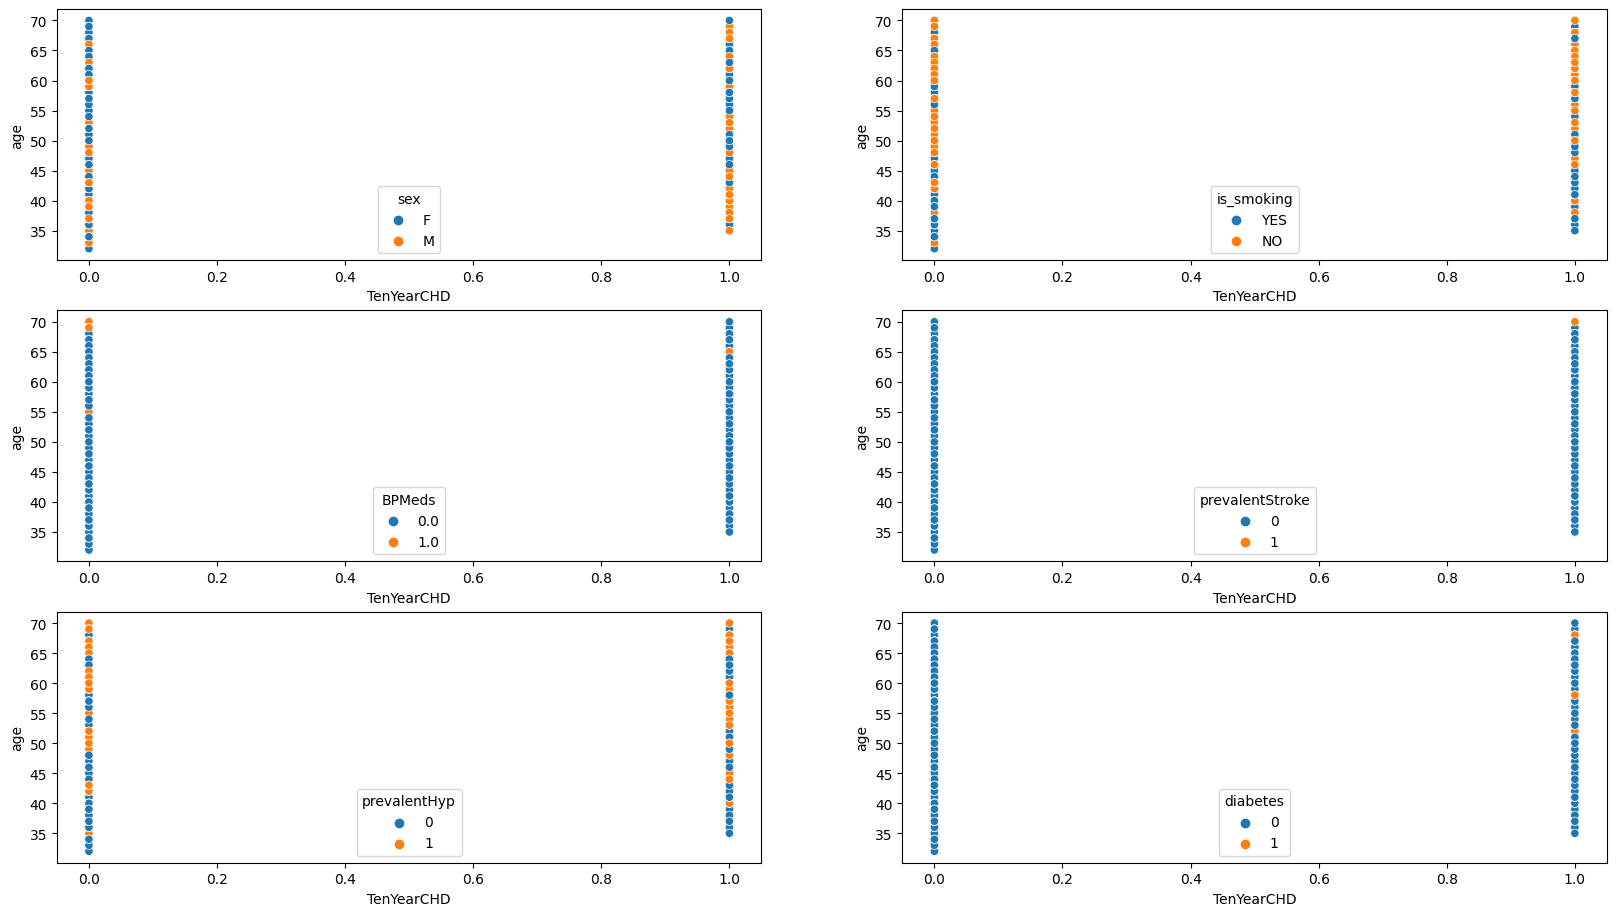

In [293]:

plt.figure(figsize = (20,15))
for i in range(1,len(cat_cols[:-1])):
  plt.subplot(len(cat_cols)//2,2,i)
  sns.scatterplot(data = df,y = 'age',x = 'TenYearCHD',hue = cat_cols[i])
plt.show()

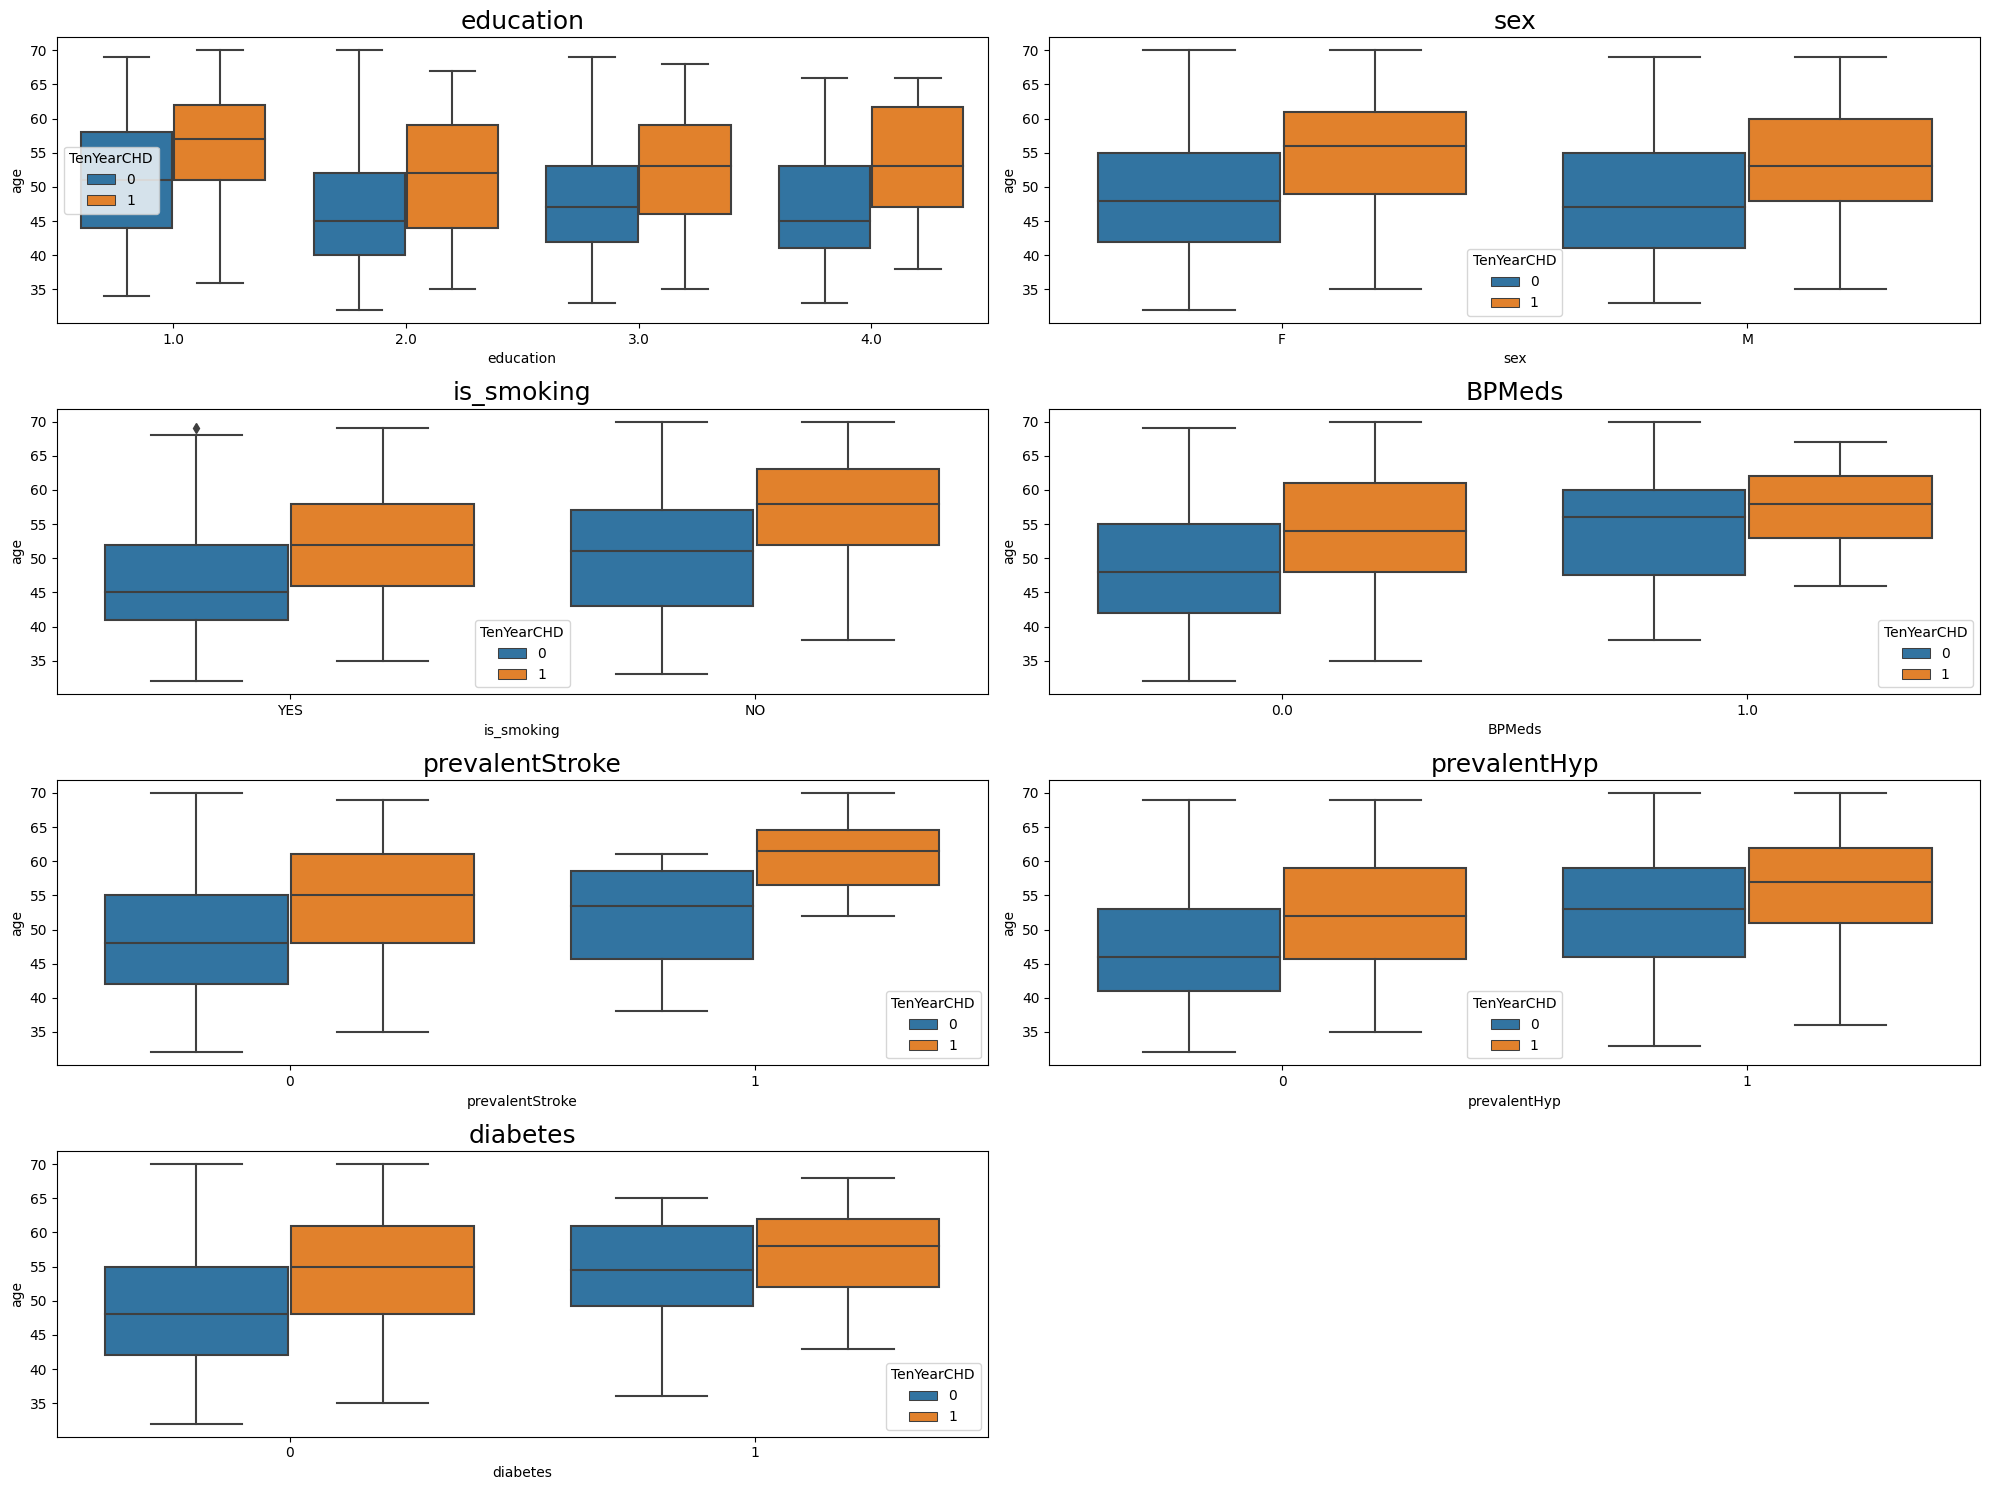

In [294]:
plt.figure(figsize = (20,15))
for i in range(len(cat_cols[:-1])):
  plt.subplot(len(cat_cols)//2,2,i+1)
  sns.boxplot(data = df,x = cat_cols[i],y = 'age',hue = 'TenYearCHD')
  plt.title(cat_cols[i],size = 18)
  plt.tight_layout()
plt.show()

## Multi-Variate Analysis

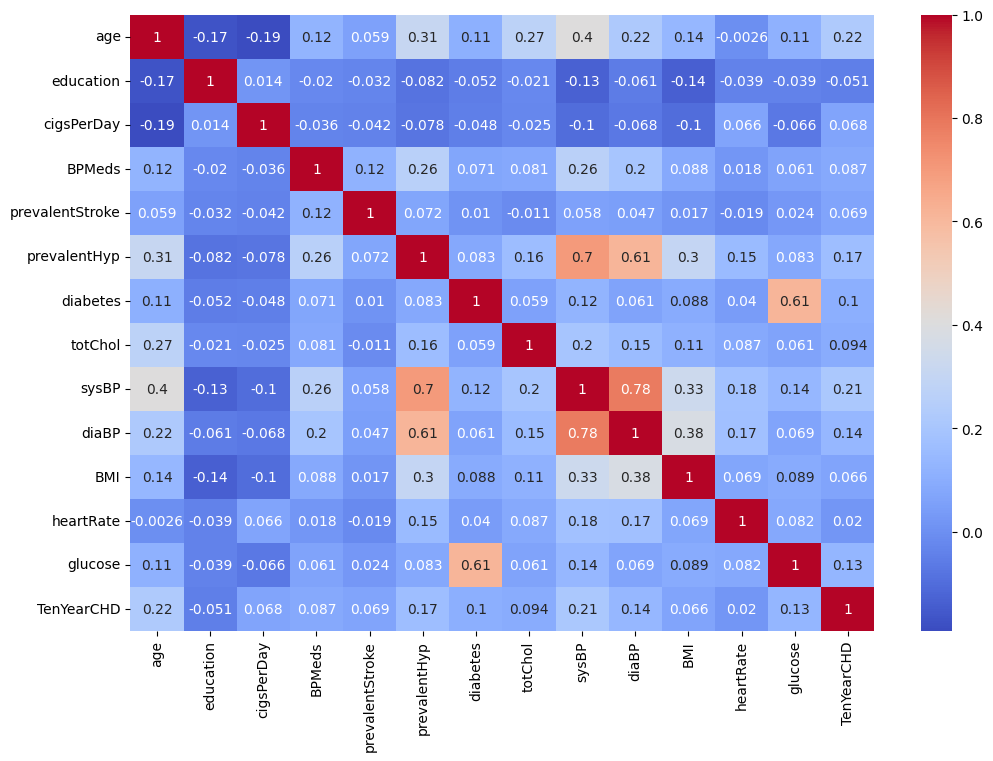

In [28]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')
plt.show()

## Data Processing

In [29]:
df.head(3)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [30]:
print(cat_cols)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


In [31]:
df[cat_cols].head(3)

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,2.0,F,YES,0.0,0,0,0,1
1,4.0,M,NO,0.0,0,1,0,0
2,1.0,F,YES,0.0,0,0,0,0


In [32]:
df['BPMeds'].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [33]:
df = pd.get_dummies(df,columns = ['education','sex','is_smoking'])
df

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,1,0,0,1,0,0,1
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0,0,1,0,1,1,0
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,0,1,0,0,1
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,0,0,0,0,1,0,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,1,0,0,0,1,0,1,0
3386,46,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,1,0,0,0,1,0,1,0
3387,44,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,0,0,1,0,0,1,0,1
3388,60,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0,1,0,0,0,0,1,1,0


In [34]:
df[num_cols].head(3)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,3.0,221.0,148.0,85.0,25.38,90.0,80.0
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [36]:
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,1.682783,-0.506751,0.0,0,0,0,-0.356539,0.690879,0.176093,-0.100635,1.171675,-0.074275,1,0,1,0,0,1,0,0,1
1,-1.576210,-0.759679,0.0,0,1,0,-0.556594,1.588193,1.257462,0.968422,-0.332292,-0.290185,0,0,0,0,1,0,1,1,0
2,-0.412284,0.083414,0.0,0,0,0,0.288084,-0.744824,-0.988457,-1.325547,1.004567,0.530271,0,1,0,0,0,1,0,0,1
3,0.053287,0.926507,0.0,0,1,0,-0.089799,1.139536,0.425640,0.600706,-0.666507,0.530271,1,1,0,0,0,0,1,0,1
4,1.682783,1.769600,0.0,0,0,0,0.088028,0.174923,0.176093,0.152627,-0.499400,-0.203821,0,1,0,0,0,1,0,0,1


In [216]:
from sklearn.model_selection import train_test_split
X = df.drop('TenYearCHD',axis = 1)
y = df['TenYearCHD']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42,stratify = y)
print(X_train.shape)
print(X_test.shape)

(2373, 20)
(1017, 20)


## Training Model 

## K Nearest Neighbors

In [154]:
# Import Kneighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Setup arrays to store train and test accuracies
params = {'n_neighbors':np.arange(1,20),'algorithm':['auto','ball_tree','kd_tree','brute']}

# setup a knn classifier with k neighbors
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,params,cv = 10,n_jobs = -1,verbose = 2)
knn_cv.fit(X_train,y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             verbose=2)

In [155]:
knn_cv.best_score_

0.8508172889408927

In [156]:
knn_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 16}

In [157]:
knn_cv.best_estimator_

KNeighborsClassifier(n_neighbors=16)

In [158]:
knn_clf = knn_cv.best_estimator_.fit(X_train,y_train)


## Evaluating KNN model

In [159]:
tr_pred = knn_clf.predict(X_train)
tr_prob = knn_clf.predict_proba(X_train)[:,1]

In [160]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_auc_score
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [161]:
confusion_matrix(y_train,tr_pred)

array([[2009,    6],
       [ 347,   11]])

In [162]:
print(classification_report(y_train,tr_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2015
           1       0.65      0.03      0.06       358

    accuracy                           0.85      2373
   macro avg       0.75      0.51      0.49      2373
weighted avg       0.82      0.85      0.79      2373



In [163]:
train_pred = pd.DataFrame({'Id':y_train.index,'CHD':y_train.values,'Probability':tr_prob,'Predicted':tr_pred})
train_pred.head()

,Id,CHD,Probability,Predicted
0,2472,0,0.1875,0
1,1381,0,0.0625,0
2,2418,0,0.3125,0
3,539,0,0.0625,0
4,530,0,0.1875,0


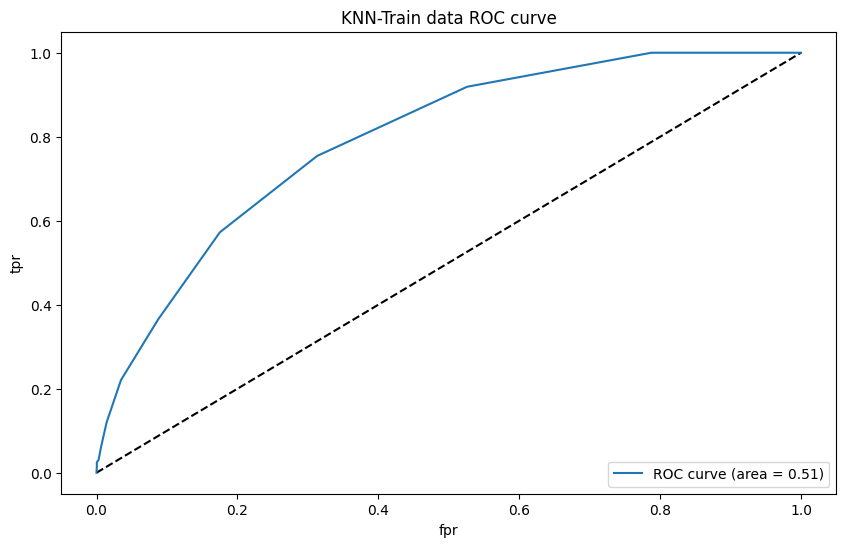

In [164]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train,tr_prob)
plt.figure(figsize = (10,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % roc_auc_score(y_train,tr_pred))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN-Train data ROC curve')
plt.legend(loc = 'lower right')
plt.show()

## Making Predictions on Test set

In [165]:
y_pred = knn_clf.predict(X_test)
y_prob = knn_clf.predict_proba(X_test)[:,1]

In [166]:
test_pred = pd.DataFrame({'Id':y_test.index,'CHD':y_test.values,'Probability':y_prob,'Predicted':y_pred})
test_pred.head()

,Id,CHD,Probability,Predicted
0,810,0,0.1250,0
1,2203,0,0.1250,0
2,744,0,0.0000,0
3,1294,0,0.0625,0
4,1513,0,0.0625,0


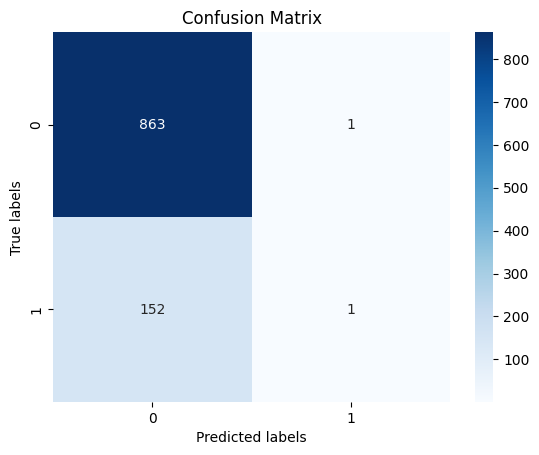

In [167]:
labels = ['0', '1']
cm_knn = confusion_matrix(y_test,test_pred.Predicted)

ax= plt.subplot()
sns.heatmap(cm_knn, annot=True, ax = ax,fmt='d',cmap = 'Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [168]:
print(classification_report(y_test,test_pred.Predicted))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       864
           1       0.50      0.01      0.01       153

    accuracy                           0.85      1017
   macro avg       0.68      0.50      0.47      1017
weighted avg       0.80      0.85      0.78      1017



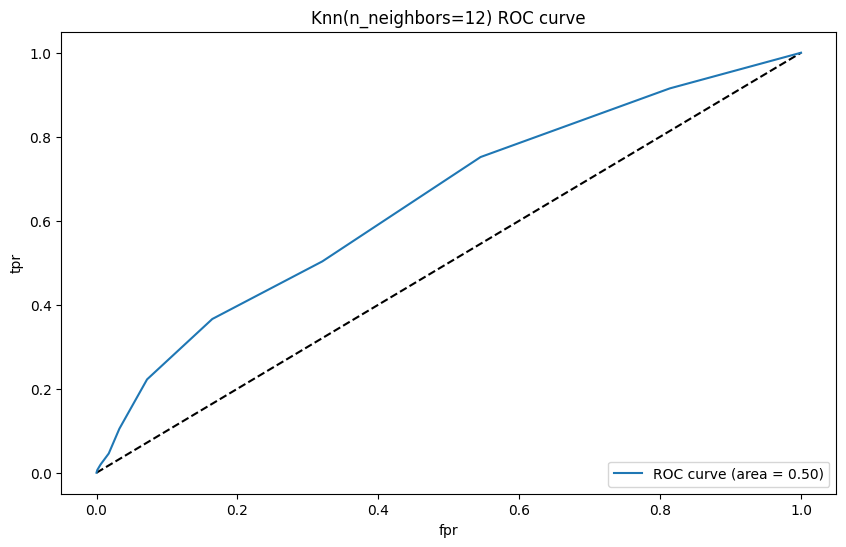

In [169]:
fpr,tpr,threshold = roc_curve(y_test,y_prob)
plt.figure(figsize = (10,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % roc_auc_score(y_test,y_pred))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=12) ROC curve')
plt.legend(loc = 'lower right')
plt.show()

In [170]:
print(cm_knn)

[[863   1]
 [152   1]]


In [192]:
TP = cm_knn[1,1] # True Positive
FP = cm_knn[0,1] # False Positive
FN = cm_knn[1,0] # False Negative
TN = cm_knn[0,0] # True Negative

print('TP:',TP)
print('FP:',FP)
print('FN:',FN)
print('TN:',TN)

TP: 1
FP: 1
FN: 152
TN: 863


In [193]:
result = pd.DataFrame({'Parameters':['Accuracy','Precision','Sensitivity','Specificity','F1_Score'],'KNN':np.nan})
result.loc[0,'KNN'] = accuracy_score(y_test,y_pred)
result.loc[1,'KNN'] = TP/float(TP+FP)
result.loc[2,'KNN'] = TP/float(TP+FN)
result.loc[3,'KNN'] = TN/float(TN+FP)
result.loc[4,'KNN'] = f1_score(y_test,y_pred)
result

,Parameters,KNN
0,Accuracy,0.849558
1,Precision,0.500000
2,Sensitivity,0.006536
3,Specificity,0.998843
4,F1_Score,0.012903


## Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier
ran_clf = RandomForestClassifier()

In [257]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42,stratify = y)

In [258]:
params = {'n_estimators':[50,80,100],'criterion':['gini','entropy'],'max_depth':[3,5,7]}
ran_cv = GridSearchCV(ran_clf,params,scoring = 'roc_auc',n_jobs = -1,cv = 10,verbose = 2)
ran_cv.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [240]:
ran_cv.best_score_

0.7054697966242964

In [259]:
ran_cv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}

In [260]:
ran_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=80)

In [261]:
random = ran_cv.best_estimator_.fit(X_train,y_train)

## Evaluating Model

In [262]:
tr_pred = random.predict(X_train)
tr_prob = random.predict_proba(X_train)[:,1]

In [245]:
confusion_matrix(y_train,tr_pred)

array([[2015,    0],
       [ 346,   12]])

In [263]:
print(classification_report(y_train,tr_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2015
           1       1.00      0.05      0.10       358

    accuracy                           0.86      2373
   macro avg       0.93      0.53      0.51      2373
weighted avg       0.88      0.86      0.80      2373



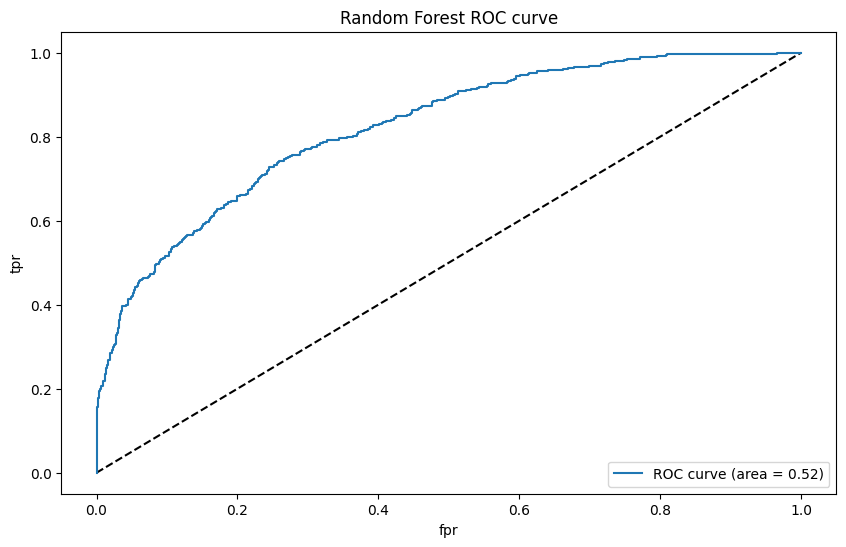

In [247]:
fpr,tpr,threshold = roc_curve(y_train,tr_prob)
plt.figure(figsize = (10,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % roc_auc_score(y_train,tr_pred))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.legend(loc = 'lower right')
plt.show()

## Making Predictions on Test Set

In [264]:
pred_ran = random.predict(X_test)
prob_ran = random.predict_proba(X_test)[:,1]

In [265]:
print(classification_report(y_test,pred_ran))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       864
           1       0.50      0.01      0.01       153

    accuracy                           0.85      1017
   macro avg       0.68      0.50      0.47      1017
weighted avg       0.80      0.85      0.78      1017



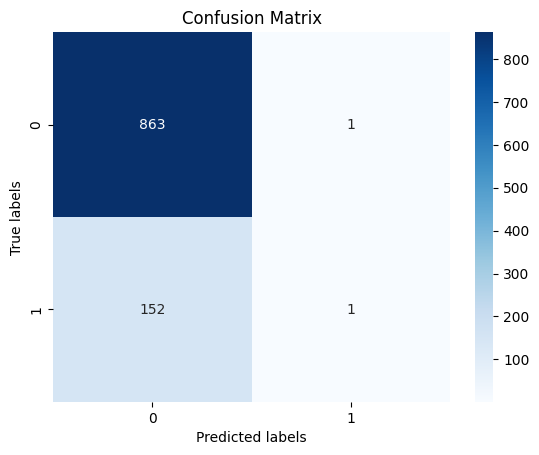

In [266]:
labels = ['0', '1']
cm_ran =confusion_matrix(y_test,pred_ran)

ax= plt.subplot()
sns.heatmap(cm_ran, annot=True, ax = ax,fmt='d',cmap = 'Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

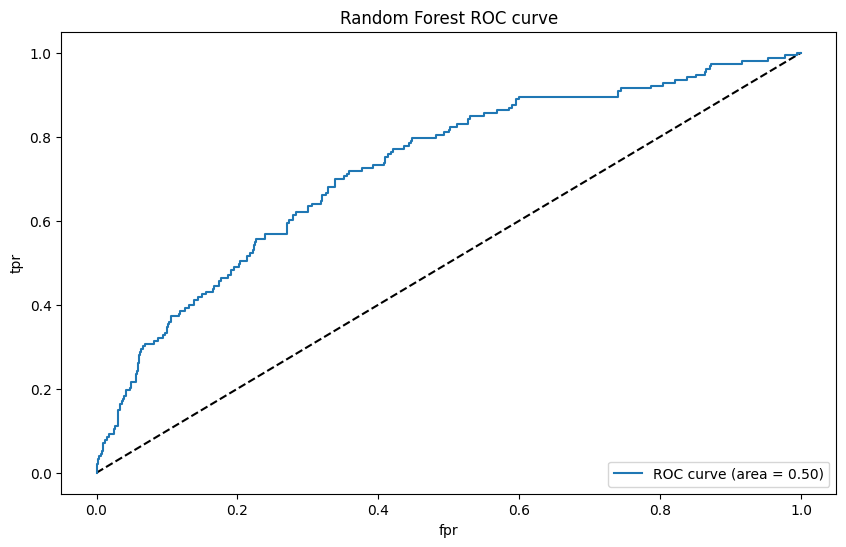

In [251]:
fpr,tpr,threshold = roc_curve(y_test,prob_ran)
plt.figure(figsize = (10,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label = 'ROC curve (area = %0.2f)' % roc_auc_score(y_test,pred_ran))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.legend(loc = 'lower right')
plt.show()

In [252]:
cm_ran

array([[864,   0],
       [153,   0]])

In [253]:
TP = cm_ran[1,1] # True Positive
FP = cm_ran[0,1] # False Positive
FN = cm_ran[1,0] # False Negative
TN = cm_ran[0,0] # True Negative

print('TP:',TP)
print('FP:',FP)
print('FN:',FN)
print('TN:',TN)

TP: 0
FP: 0
FN: 153
TN: 864


In [254]:
result.loc[0,'Random Forest'] = accuracy_score(y_test,pred_ran)
result.loc[1,'Random Forest'] = TP/float(TP+FP)
result.loc[2,'Random Forest'] = TP/float(TP+FN)
result.loc[3,'Random Forest'] = TN/float(TN+FP)
result.loc[4,'Random Forest'] = f1_score(y_test,pred_ran)
result

,Parameters,KNN,Random Forest
0,Accuracy,0.849558,0.849558
1,Precision,0.500000,NaN
2,Sensitivity,0.006536,0.000000
3,Specificity,0.998843,1.000000
4,F1_Score,0.012903,0.000000


- Accuracy tells us how many times the ML model was correct overall. 
- Precision is how good the model is at predicting a specific category. 
- Recall or Sensitivity, tells us how many times the model was able to detect a specific category.
- The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers. 


### Plot Variable Importance

In [255]:
features = X_train.columns
importance = random.feature_importances_
indices = np.argsort(importance)

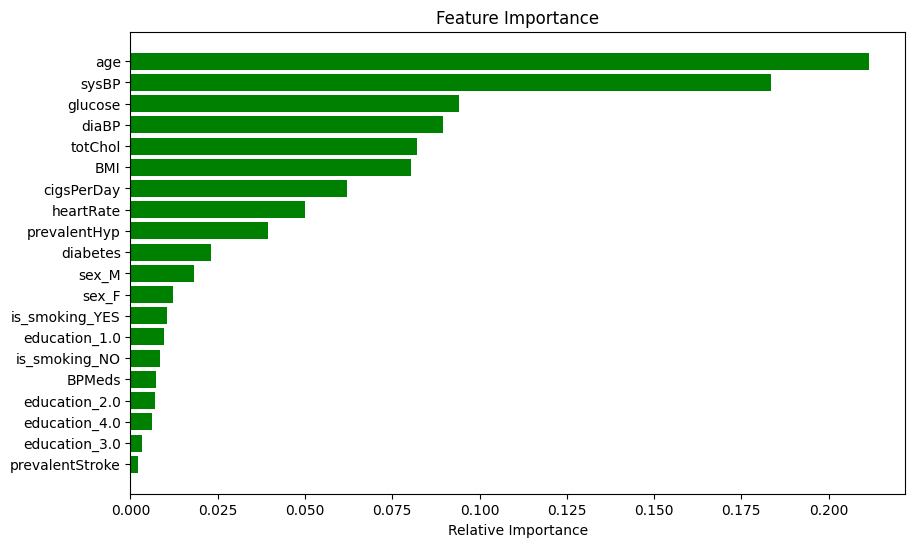

In [256]:
plt.figure(figsize = (10,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()